In [172]:
%matplotlib inline

import numpy as np
import theano
import theano.tensor as T
rng = np.random
import matplotlib.pyplot as plt

# generate data
min = 0
max = 10
samples = 10000
training_steps = 1000
learning_rate = .1

X = np.linspace(min, max, samples)
Y = (X/max) - rng.rand(samples)/2.5
Y[Y < 0] = 0
Y = np.around(Y)

In [173]:
print Y

[ 0.  0.  0. ...,  1.  1.  1.]


In [174]:
# initialize variables
x = T.vector("x")
y = T.vector("y")
a = theano.shared(1.0, name = 'a')
b = theano.shared(1.0, name = 'b')

In [175]:
# Construct Theano expression graph
s = 1 / (1 + T.exp(-T.dot(x, a) - b))
predict = s > 0.5
cost = T.sum(T.pow(s - y, 2))/(2*samples)

In [176]:
ga, gb = T.grad(cost, [a, b])

train = theano.function([x, y], cost, updates=[(a, a - learning_rate * ga),(b, b - learning_rate * gb)])
test = theano.function([x], s)

In [177]:
# train
for i in range(training_steps):
    train(X, Y)

In [178]:
print("a -> {}\nb -> {}".format(b.get_value(), a.get_value()))

a -> -2.12190402198
b -> 0.312847966855


In [179]:
sigmoid = theano.function([x], s)

In [180]:
inputSample = np.linspace(-10, 10, 100)
out = sigmoid(inputSample)

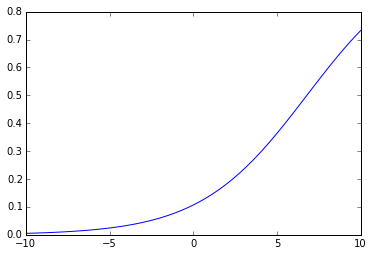

In [181]:
plt.plot(inputSample, out)

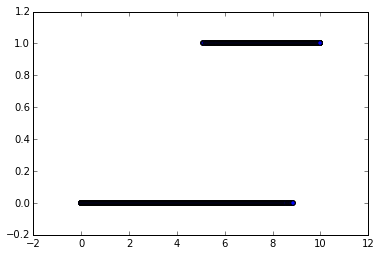

In [182]:
plt.scatter(X, Y)

In [183]:
test([7])

array([ 0.51700138])